In [35]:
import subprocess
import os
import scipy.io.wavfile as wav
import IPython
import matplotlib.pyplot as plt
import numpy as np
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
%matplotlib inline

In [2]:
ffmpeg_path = 'D:/Work/UpWork/Nicholas_Video/ffmpeg/bin/ffmpeg.exe'
raw_videos_path = 'D:/Work/UpWork/Nicholas_Video/RAW'
highlight_path = 'D:/Work/UpWork/Nicholas_Video/Highlights'

In [3]:
file_list = [f for f in os.listdir(raw_videos_path) if f.endswith('.mp4')]

In [4]:
command = [[ffmpeg_path,'-i', file, os.path.splitext(file)[0]+'.wav'] for file in file_list]

In [5]:
for cmd in command:
    #Remove old wav files
    try:
        os.remove(raw_videos_path+'/'+os.path.splitext(cmd[2])[0]+'.wav')  
    except OSError:
        pass
    process = subprocess.run(cmd, cwd=raw_videos_path)

In [6]:
wav_file_list = [w for w in os.listdir(raw_videos_path) if w.endswith('.wav')]

In [97]:
for file in wav_file_list:
    #Read wav file
    sample_rate, data = wav.read(raw_videos_path+'/'+file)
    #Conver to mono channel
    data = data.astype(np.int32)
    data_mono = (data[:,0] + data[:,1])/2
    wav_duration = len(data)/sample_rate
    max_slice=5
    window_length = max_slice * sample_rate
    moving_average = np.convolve(abs(data_mono), np.ones((window_length,))/window_length, mode='same')

before - Copy (2).wav
before - Copy (3).wav
before - Copy (4).wav
before - Copy (5).wav
before - Copy.wav
before.wav


In [115]:
histogram, bins = np.histogram(moving_average)

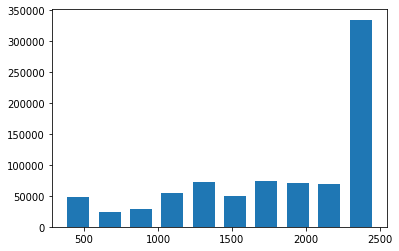

In [116]:
center = (bins[:-1] + bins[1:]) / 2
width = 0.7 * (bins[1] - bins[0])
plt.bar(center, histogram, align='center', width=width)
plt.show()

In [118]:
threshold = bins[-3]

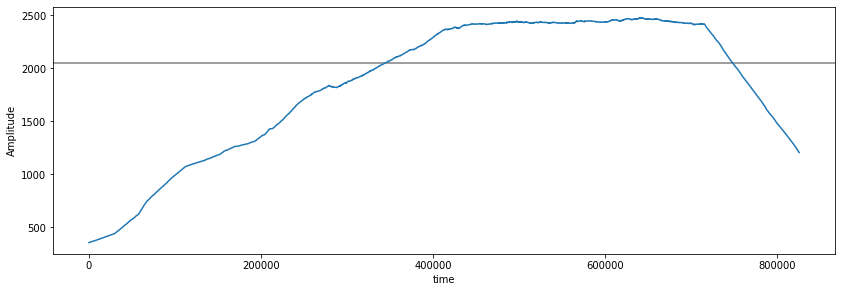

In [119]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(211)
plt.axhline(threshold, color="gray")
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(moving_average)

In [90]:
#boolean array to find intersection points
index_finder = np.zeros(len(moving_average))
#Set all the array elements greater than threshold = 1
index_finder[np.where(moving_average>threshold)] = 1
#Find points where the array flips
start_end_array = np.where(index_finder[:-1] != index_finder[1:])[0]
chunks = []
#Create a tuple for all those points where the average crosses threshold
for index in range(0,len(start_end_array),2):
    chunks.append([np.floor(start_end_array[index]/sample_rate), np.ceil(start_end_array[index+1]/sample_rate)])

In [96]:
for cmd in command:
    print(cmd[2])

before - Copy (2).mp4
before - Copy (3).mp4
before - Copy (4).mp4
before - Copy (5).mp4
before - Copy.mp4
before.mp4


In [32]:
for cmd in command:
    #Remove old wav files
    ffmpeg_extract_subclip(raw_videos_path+'/'+os.path.splitext(cmd[2])[0]+'.mp4', chunks[0][0], chunks[0][1], targetname=raw_videos_path+'/'+os.path.splitext(cmd[2])[0]+'_highlight_'+'.mp4')


[MoviePy] Running:
>>> C:\Users\prate\Anaconda2\envs\python36\Library\bin\ffmpeg.exe -y -i D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (2).mp4 -ss 8.00 -t 9.00 -vcodec copy -acodec copy D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (2)_highlight_.mp4
... command successful.

[MoviePy] Running:
>>> C:\Users\prate\Anaconda2\envs\python36\Library\bin\ffmpeg.exe -y -i D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (3).mp4 -ss 8.00 -t 9.00 -vcodec copy -acodec copy D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (3)_highlight_.mp4
... command successful.

[MoviePy] Running:
>>> C:\Users\prate\Anaconda2\envs\python36\Library\bin\ffmpeg.exe -y -i D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (4).mp4 -ss 8.00 -t 9.00 -vcodec copy -acodec copy D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (4)_highlight_.mp4
... command successful.

[MoviePy] Running:
>>> C:\Users\prate\Anaconda2\envs\python36\Library\bin\ffmpeg.exe -y -i D:/Work/UpWork/Nicholas_Video/RAW/before - Copy (5).mp4 -ss 8.